## Review: Visualizing Quantitative Variables

In this notebook we will examine a dataset of all domestic flights that departed from one of thr NYC airports on November 16, 2013

Let's summarize the dep_delay feature.

In [6]:
import pandas as pd
data_dir = "https://datasci112.stanford.edu/data/"
df = pd.read_csv(data_dir + "flights_nyc_20131116.csv")
df

,carrier,flight,origin,dest,dep_delay
0,US,1895,EWR,CLT,-5.0
1,UA,1014,LGA,IAH,-3.0
2,AA,2243,JFK,MIA,2.0
3,UA,303,JFK,SFO,-8.0
4,US,795,LGA,PHL,-8.0
...,...,...,...,...,...
573,B6,745,JFK,PSE,-3.0
574,B6,839,JFK,BQN,0.0
575,UA,360,EWR,PBI,NaN
576,US,1946,EWR,CLT,NaN


<Axes: ylabel='Frequency'>

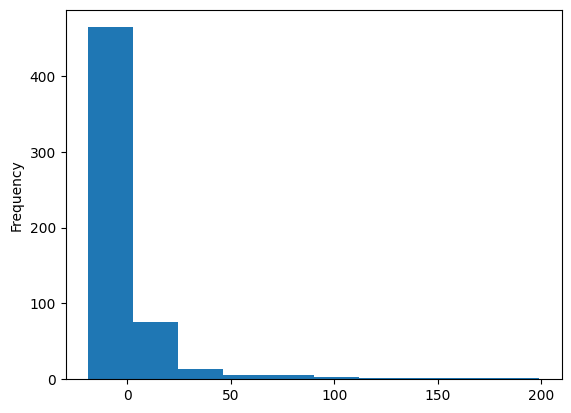

In [7]:
df["dep_delay"].plot.hist()

In [8]:
df["dep_delay"].mean()

np.float64(2.0469565217391303)

So far we already showed how to summarize a quantitative variable like dep_delay

But how do we compare delays across different carriers?

When we want to check if a flight is United Airlines(carrier = "UA") we can use `df["carrier"] == "UA"`

It will create a **Series of booleans** indicates whether each flight was United Airlines or not. This is another example of vectorization.

In [16]:
united_flights = df["carrier"] == "UA"

united_flights

0      False
1       True
2      False
3       True
4      False
       ...  
573    False
574    False
575     True
576    False
577    False
Name: carrier, Length: 578, dtype: bool

In [17]:
# The number of United flightes

united_flights.sum()

np.int64(123)

In [18]:
# The proportion of flights that day that were united

united_flights.mean()

np.float64(0.21280276816608998)

With this exercise we can indicate that:
1. Applying a relational operator like `==`, `<`, `>`, and `!=` on a Series produces a **Series of booleans**, by vectorization.

2. Arithmetic operations can be performed on booleans in Series, treating `True` as **1** and `False` as **0**

!! A boolean Series can be passed as a key to a DataFrame to **mask** the data.

- A boolean mask actas as a **filter** to select data.

In [19]:
df[united_flights] # Only UA flights in the dataset

,carrier,flight,origin,dest,dep_delay
1,UA,1014,LGA,IAH,-3.0
3,UA,303,JFK,SFO,-8.0
8,UA,1187,LGA,ORD,-5.0
9,UA,258,EWR,MCO,-2.0
15,UA,665,EWR,SFO,-1.0
...,...,...,...,...,...
537,UA,1631,EWR,IAH,-3.0
549,UA,1409,EWR,TPA,-1.0
552,UA,1071,EWR,BQN,5.0
562,UA,1066,EWR,BOS,-5.0


**Exercise:** Summary of United Airlines Delay

In [21]:
UA_flights = df["carrier"] == "UA"

UA_flights

0      False
1       True
2      False
3       True
4      False
       ...  
573    False
574    False
575     True
576    False
577    False
Name: carrier, Length: 578, dtype: bool

In [22]:
df[UA_flights]["dep_delay"].mean()

np.float64(5.590163934426229)

This is the conditional distribution of mean(dep_delay | carrier = UA)

**Exercise:** Compare carriers with their delays

In [23]:
for carrier in df["carrier"].unique():
    print(carrier, df[df["carrier"] == carrier]["dep_delay"].mean())

US -2.324324324324324
UA 5.590163934426229
AA -1.337837837837838
DL 3.295238095238095
B6 1.5378787878787878
EV 1.2476190476190476


### The Problem About This Exercise

- It is inconvenient (have to write a for loop over the possible values).
- The values are not stored in a Pandas object for further analysis.

## The Split-Apply-Combine Paradigm

The **SAC Paradigm** says that whenever you break up a big promblem into manageable pieces, operate on each piece independently and then put all the pieces back together.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXDZ6uGbAQl7PbKe0MkP4dPg_8ZCNuPJ4FTDbsIa0zIjB4469GiQBf-BXyWLK9_FazEqM&usqp=CAU" width="800px" >


The SAC paradigm is implemented in Pandas as the `.groupby()` method.

- `.groupby()` method creates a **GroupBy** object.

In [28]:
df.groupby("carrier")["dep_delay"].mean()

carrier
AA   -1.337838
B6    1.537879
DL    3.295238
EV    1.247619
UA    5.590164
US   -2.324324
Name: dep_delay, dtype: float64

<Axes: xlabel='carrier'>

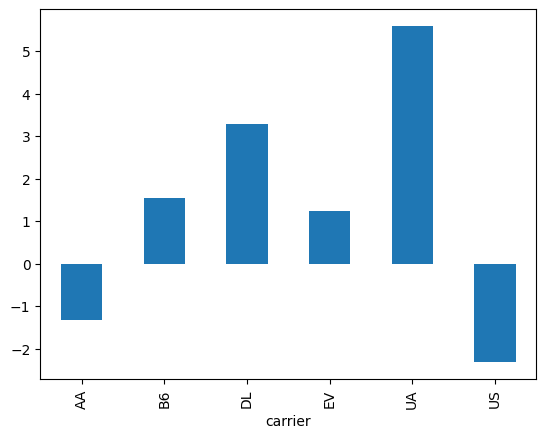

In [31]:
df.groupby("carrier")["dep_delay"].mean().plot.bar()

## Splitting on Multiple Keys

What if we wanted to also split by the Origin Airport?

In [38]:
df.groupby(["carrier", "origin"])["dep_delay"].mean()

carrier  origin
AA       EWR       -3.375000
         JFK        1.771429
         LGA       -4.322581
B6       EWR       -0.823529
         JFK       -0.836735
         LGA       17.588235
DL       EWR       19.222222
         JFK        4.980000
         LGA       -1.652174
EV       EWR        1.483146
         JFK        0.000000
         LGA       -0.083333
UA       EWR        7.525773
         JFK        1.909091
         LGA       -4.928571
US       EWR       -5.000000
         JFK        5.400000
         LGA       -5.312500
Name: dep_delay, dtype: float64

In [39]:
df.groupby(["carrier", "origin"])["dep_delay"].mean().unstack("origin")

origin,EWR,JFK,LGA
carrier,,,
AA,-3.375000,1.771429,-4.322581
B6,-0.823529,-0.836735,17.588235
DL,19.222222,4.980000,-1.652174
EV,1.483146,0.000000,-0.083333
UA,7.525773,1.909091,-4.928571
US,-5.000000,5.400000,-5.312500


<Axes: xlabel='carrier'>

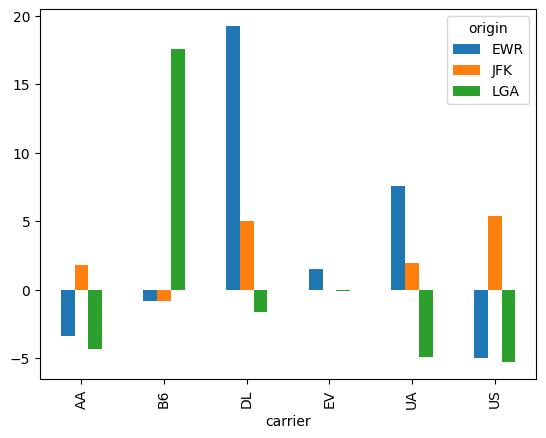

In [40]:
df.groupby(["carrier", "origin"])["dep_delay"].mean().unstack("origin").plot.bar()

#### Something is weird?

- **Negative Delays ->** Some flights departed earlier than scheduled.
- **Extremely High Delays ->** Certain carrier-origin combinations have averages far above the norm.
- **Distribution Imbalance ->** Some carriers shows values that are very different compared to others.

## Comparing Distributions

It is possible to use `.groupby()`with all kinds of operations.


/var/folders/xs/ht9rdgp11hs1bn_z_rxntkhw0000gn/T/ipykernel_33060/3101521202.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].set_xlabel("Departure Delay")


Text(0.5, 0, 'Departure Delay')

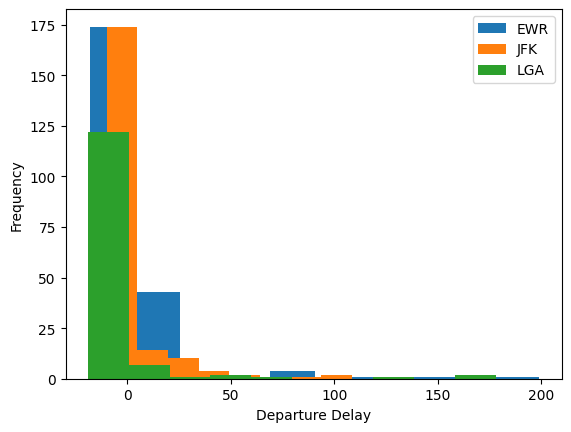

In [43]:
axes = df.groupby("origin")["dep_delay"].plot.hist(legend=True)
axes[0].set_xlabel("Departure Delay")

To prevent **overplotting**, we set the opacith parameter `alpha`


/var/folders/xs/ht9rdgp11hs1bn_z_rxntkhw0000gn/T/ipykernel_33060/2262119834.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].set_xlabel("Departure Delay")


Text(0.5, 0, 'Departure Delay')

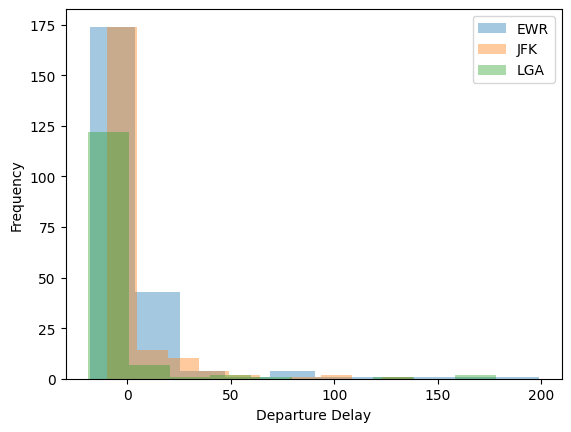

In [44]:
axes = df.groupby("origin")["dep_delay"].plot.hist(legend=True, alpha=0.4)
axes[0].set_xlabel("Departure Delay")

Density histograms visualize the conditional distribution `dep_delay | carrier` directly, allowing for easy comparison.

/var/folders/xs/ht9rdgp11hs1bn_z_rxntkhw0000gn/T/ipykernel_33060/303765894.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].set_xlabel("Departure Delay")


Text(0.5, 0, 'Departure Delay')

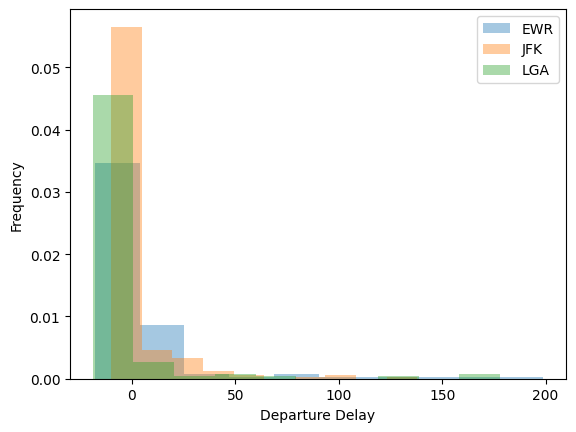

In [46]:
axes = df.groupby("origin")["dep_delay"].plot.hist(legend=True, alpha=0.4, density=True)
axes[0].set_xlabel("Departure Delay")